In [1]:
from capstone_modules import Production_Data, Temperature_Data, ICO_Composite_Indicator_Index

import pandas as pd
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import data

In [2]:
ICO_composite_indicator = ICO_Composite_Indicator_Index()

brazilian_naturals_data = ICO_composite_indicator.get_ICO_indicator_data_by_ICO_category("Brazilian Naturals")
colombian_milds_data = ICO_composite_indicator.get_ICO_indicator_data_by_ICO_category("Colombian Milds")
other_milds_data = ICO_composite_indicator.get_ICO_indicator_data_by_ICO_category("Other Milds")
robusta_data = ICO_composite_indicator.get_ICO_indicator_data_by_ICO_category("Robustas")
composite_indicator_data = ICO_composite_indicator.get_ICO_composite_indicator_data_by_ICO_category()

## Visualizing seasonal decomposition

//anaconda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


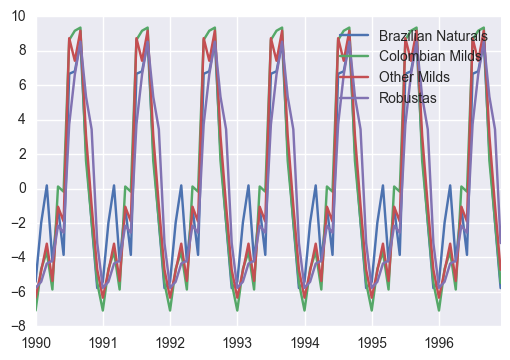

In [3]:
seasonal_decompose(brazilian_naturals_data[brazilian_naturals_data.index.year < 1997]).seasonal.plot()
seasonal_decompose(colombian_milds_data[colombian_milds_data.index.year < 1997]).seasonal.plot()
seasonal_decompose(other_milds_data[other_milds_data.index.year < 1997]).seasonal.plot()
seasonal_decompose(robusta_data[robusta_data.index.year < 1997]).seasonal.plot()
plt.legend()
plt.show()

//anaconda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


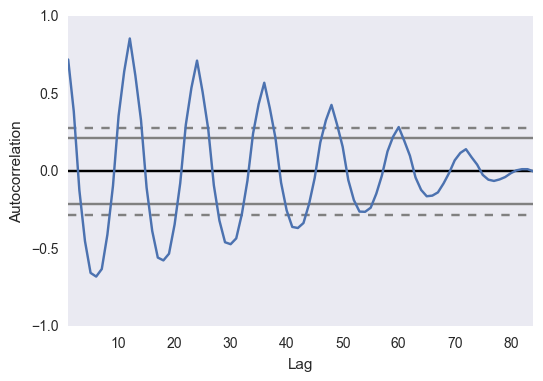

In [4]:
pd.tools.plotting.autocorrelation_plot(seasonal_decompose(colombian_milds_data[colombian_milds_data.index.year < 1997]).seasonal)
plt.show()


//anaconda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


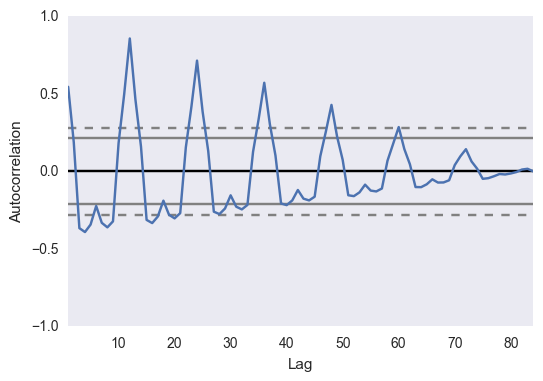

In [5]:
pd.tools.plotting.autocorrelation_plot(seasonal_decompose(composite_indicator_data[composite_indicator_data.index.year < 1997]).seasonal)
plt.show()


In [6]:
brazilian_naturals_seasonal_decomposition = seasonal_decompose(brazilian_naturals_data)
brazilian_naturals_seasonal_decomposition_trend = brazilian_naturals_seasonal_decomposition.trend
brazilian_naturals_seasonal_decomposition_seasonal = brazilian_naturals_seasonal_decomposition.seasonal
brazilian_naturals_seasonal_decomposition_residuals = brazilian_naturals_seasonal_decomposition.resid


//anaconda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


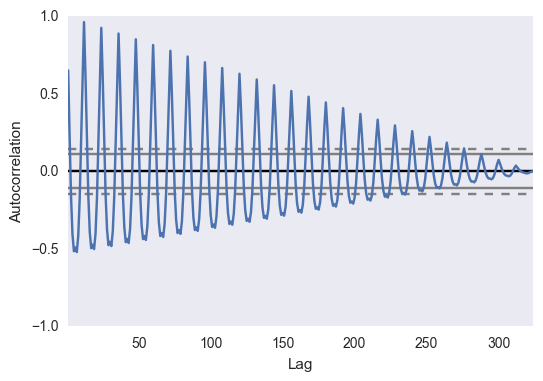

In [7]:
pd.tools.plotting.autocorrelation_plot(brazilian_naturals_seasonal_decomposition.seasonal)
plt.show()


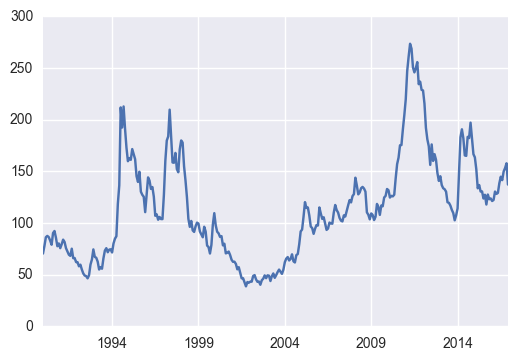

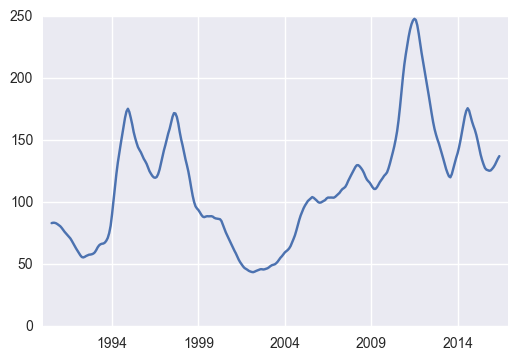

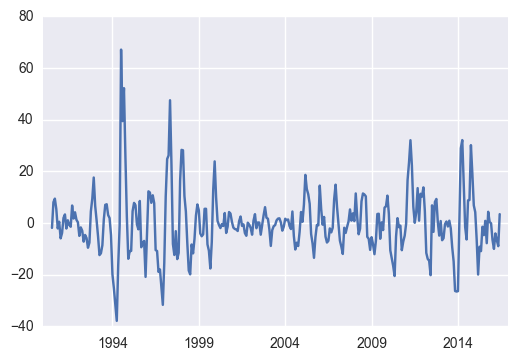

In [8]:
brazilian_naturals_data.plot()
plt.show()

brazilian_naturals_seasonal_decomposition_trend.plot()
plt.show()

brazilian_naturals_seasonal_decomposition_residuals.plot()
plt.show()


The strong linear relation means I won't need to consider the biennial weight changes.
Linear model score: 0.9950861139571293
Average cross validation score: 0.9588134080116184


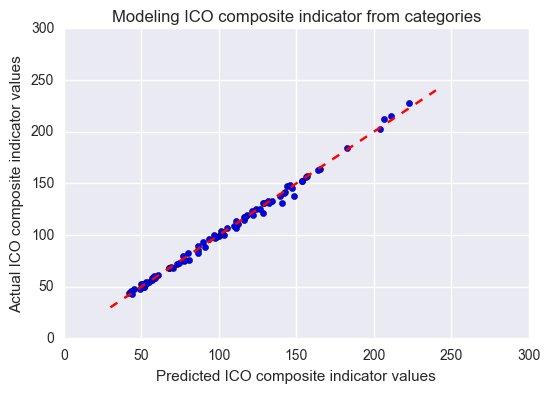

In [13]:
def modeling_composite_from_categories(dataframe):

    X = dataframe.drop("ICO composite indicator", axis = 1)
    y = dataframe["ICO composite indicator"]
    
    train_X, test_X, train_y, test_y = train_test_split(X, y)

    linear_model = LinearRegression()
    linear_model.fit(train_X, train_y)
    
    print("The strong linear relation means I won't need to consider the biennial weight changes.")
    print("Linear model score: {}".format(linear_model.score(X, y)))
    print("Average cross validation score: {}".format(cross_val_score(linear_model, X, y).mean()))

    
    plt.scatter(linear_model.predict(test_X), test_y)
    plt.plot([30,240], [30,240], "r--")
    plt.xlabel("Predicted ICO composite indicator values")
    plt.ylabel("Actual ICO composite indicator values")
    plt.title("Modeling ICO composite indicator from categories")
    plt.show()    
    
modeling_composite_from_categories(ICO_composite_indicator.ICO_indicator_data)

